In [1]:
from google.colab import files
upload=files.upload()

Saving datasets_19_420_Iris.csv to datasets_19_420_Iris.csv


In [2]:
# importing libaries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('datasets_19_420_Iris.csv')

##Preview of Data
###There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
###There are no null values, so we don't have to worry about that.
###There are 50 observations of each species (setosa, versicolor, virginica).

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

##Data Visualization
After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).

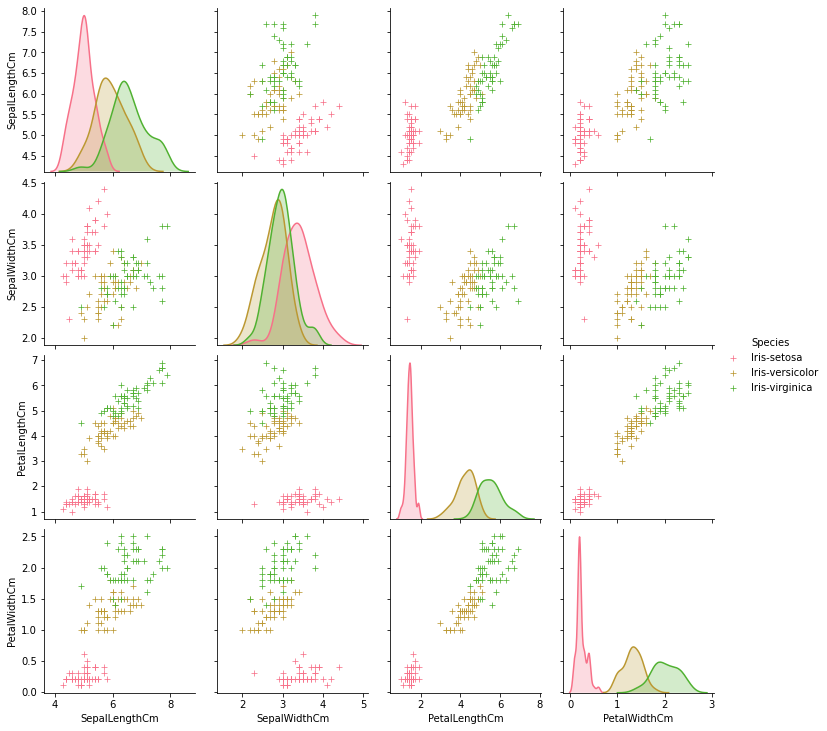

In [8]:
tmp = data.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

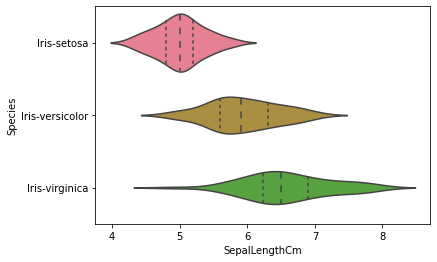

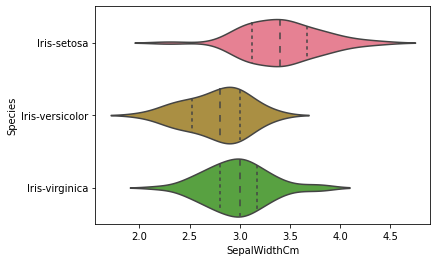

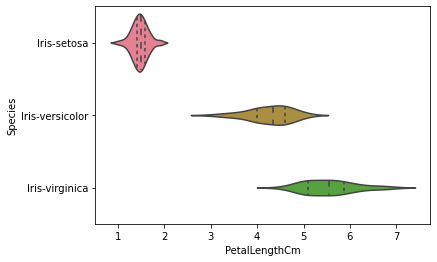

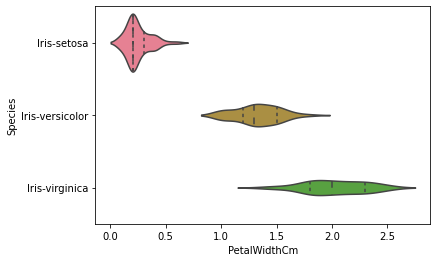

In [9]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

##Modeling

In [10]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [11]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

##Train and test on the same dataset
###This method is not suggested since the end goal is to predict iris species using a dataset the model has not seen before.
###There is also a risk of overfitting the training data.

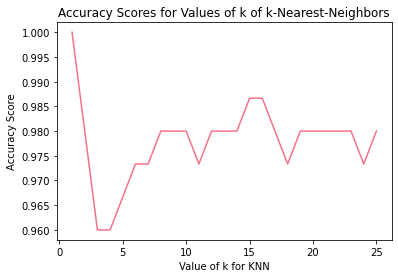

In [13]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [14]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


##Split the dataset into a training set and a testing set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


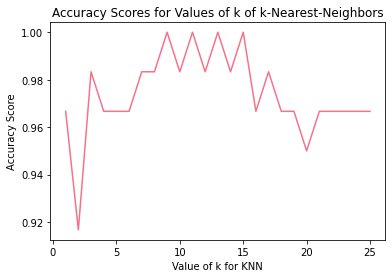

In [16]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


##Choosing KNN to Model Iris Species Prediction with k = 12

In [18]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [19]:
# make a prediction for an example of an out-of-sample observation
pred=knn.predict([[6, 3, 4, 2]])
pred

array(['Iris-versicolor'], dtype=object)